# Desarrollo de un sistema de diagnóstico de enfermedades en hojas de tomate mediante PlantCV y modelos de aprendizaje profundo

La detección temprana de enfermedades en cultivos es vital para la agricultura sostenible. Utilizando PlantCV (https://plantcv.readthedocs.io/), una biblioteca enfocada en la visión por computadora para plantas, junto con TensorFlow o PyTorch, el alumno se encargará de crear modelos de clasificación multiclase robustos. Estos modelos tendrán como objetivo identificar 10 distintas enfermedades y una clase de salud en hojas de tomate. Para el entrenamiento y evaluación, se usará el Tomato Leaves Dataset de Kaggle (https://www.kaggle.com/datasets/ashishmotwani/tomato), que contiene más de 20,000 imágenes recogidas en entornos de laboratorio e in situ. Dada la naturaleza práctica de la aplicación, se buscará desarrollar un modelo lo suficientemente eficiente como para poder ser implementado en aplicaciones móviles, permitiendo diagnósticos ágiles y efectivos en el campo.

## Carga de la data

Debido a que solo existe data para train y validacion, se procede a separar un porcentaje para hacer un test final.

In [1]:
from src.utils.data_distribution import create_test_set

create_test_set("./dataset/train", "./dataset/test", percentage=10)

Se movió el 10% de imágenes de train a test correctamente.


Se quitan caracteres innecesarios en el nombre de las carpetas.

In [1]:
from src.utils.rename_files import renombrar_carpetas
renombrar_carpetas("dataset")


Renombrado: Apple___Apple_scab -> Apple_Apple_scab
Renombrado: Apple___Black_rot -> Apple_Black_rot
Renombrado: Apple___Cedar_apple_rust -> Apple_Cedar_apple_rust
Renombrado: Apple___healthy -> Apple_healthy
Renombrado: Blueberry___healthy -> Blueberry_healthy
Renombrado: Cherry_(including_sour)___healthy -> Cherry_including_sour_healthy
Renombrado: Cherry_(including_sour)___Powdery_mildew -> Cherry_including_sour_Powdery_mildew
Renombrado: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot -> Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot
Renombrado: Corn_(maize)___Common_rust_ -> Corn_maize_Common_rust_
Renombrado: Corn_(maize)___healthy -> Corn_maize_healthy
Renombrado: Corn_(maize)___Northern_Leaf_Blight -> Corn_maize_Northern_Leaf_Blight
Renombrado: Grape___Black_rot -> Grape_Black_rot
Renombrado: Grape___Esca_(Black_Measles) -> Grape_Esca_Black_Measles
Renombrado: Grape___healthy -> Grape_healthy
Renombrado: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) -> Grape_Leaf_blight_Isariops

Ya que existen nombres de archivos muy extensos es recomendable renombrarlos a una cantidad de caracteres mas manejables

In [2]:
from src.utils.rename_files import rename_images_in_directory
base_directory = "dataset"
rename_images_in_directory(base_directory)

Renombrando imágenes en: dataset\train\Apple_Apple_scab
Renombrando imágenes en: dataset\train\Apple_Black_rot
Renombrando imágenes en: dataset\train\Apple_Cedar_apple_rust
Renombrando imágenes en: dataset\train\Apple_healthy
Renombrando imágenes en: dataset\train\Blueberry_healthy
Renombrando imágenes en: dataset\train\Cherry_including_sour_healthy
Renombrando imágenes en: dataset\train\Cherry_including_sour_Powdery_mildew
Renombrando imágenes en: dataset\train\Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot
Renombrando imágenes en: dataset\train\Corn_maize_Common_rust_
Renombrando imágenes en: dataset\train\Corn_maize_healthy
Renombrando imágenes en: dataset\train\Corn_maize_Northern_Leaf_Blight
Renombrando imágenes en: dataset\train\Grape_Black_rot
Renombrando imágenes en: dataset\train\Grape_Esca_Black_Measles
Renombrando imágenes en: dataset\train\Grape_healthy
Renombrando imágenes en: dataset\train\Grape_Leaf_blight_Isariopsis_Leaf_Spot
Renombrando imágenes en: dataset\train\Orang

## Exploracion de los datos

Resumen del Dataset:
---------------------
Train Set:
  - Apple_Apple_scab: 1815 imágenes
  - Apple_Black_rot: 1789 imágenes
  - Apple_Cedar_apple_rust: 1584 imágenes
  - Apple_healthy: 1808 imágenes
  - Blueberry_healthy: 1635 imágenes
  - Cherry_including_sour_Powdery_mildew: 1515 imágenes
  - Cherry_including_sour_healthy: 1644 imágenes
  - Corn_maize_Cercospora_leaf_spot_Gray_leaf_spot: 1478 imágenes
  - Corn_maize_Common_rust_: 1717 imágenes
  - Corn_maize_Northern_Leaf_Blight: 1718 imágenes
  - Corn_maize_healthy: 1674 imágenes
  - Grape_Black_rot: 1700 imágenes
  - Grape_Esca_Black_Measles: 1728 imágenes
  - Grape_Leaf_blight_Isariopsis_Leaf_Spot: 1550 imágenes
  - Grape_healthy: 1523 imágenes
  - Orange_Haunglongbing_Citrus_greening: 1809 imágenes
  - Peach_Bacterial_spot: 1655 imágenes
  - Peach_healthy: 1556 imágenes
  - Pepper_bell_Bacterial_spot: 1722 imágenes
  - Pepper_bell_healthy: 1790 imágenes
  - Potato_Early_blight: 1746 imágenes
  - Potato_Late_blight: 1746 imágenes

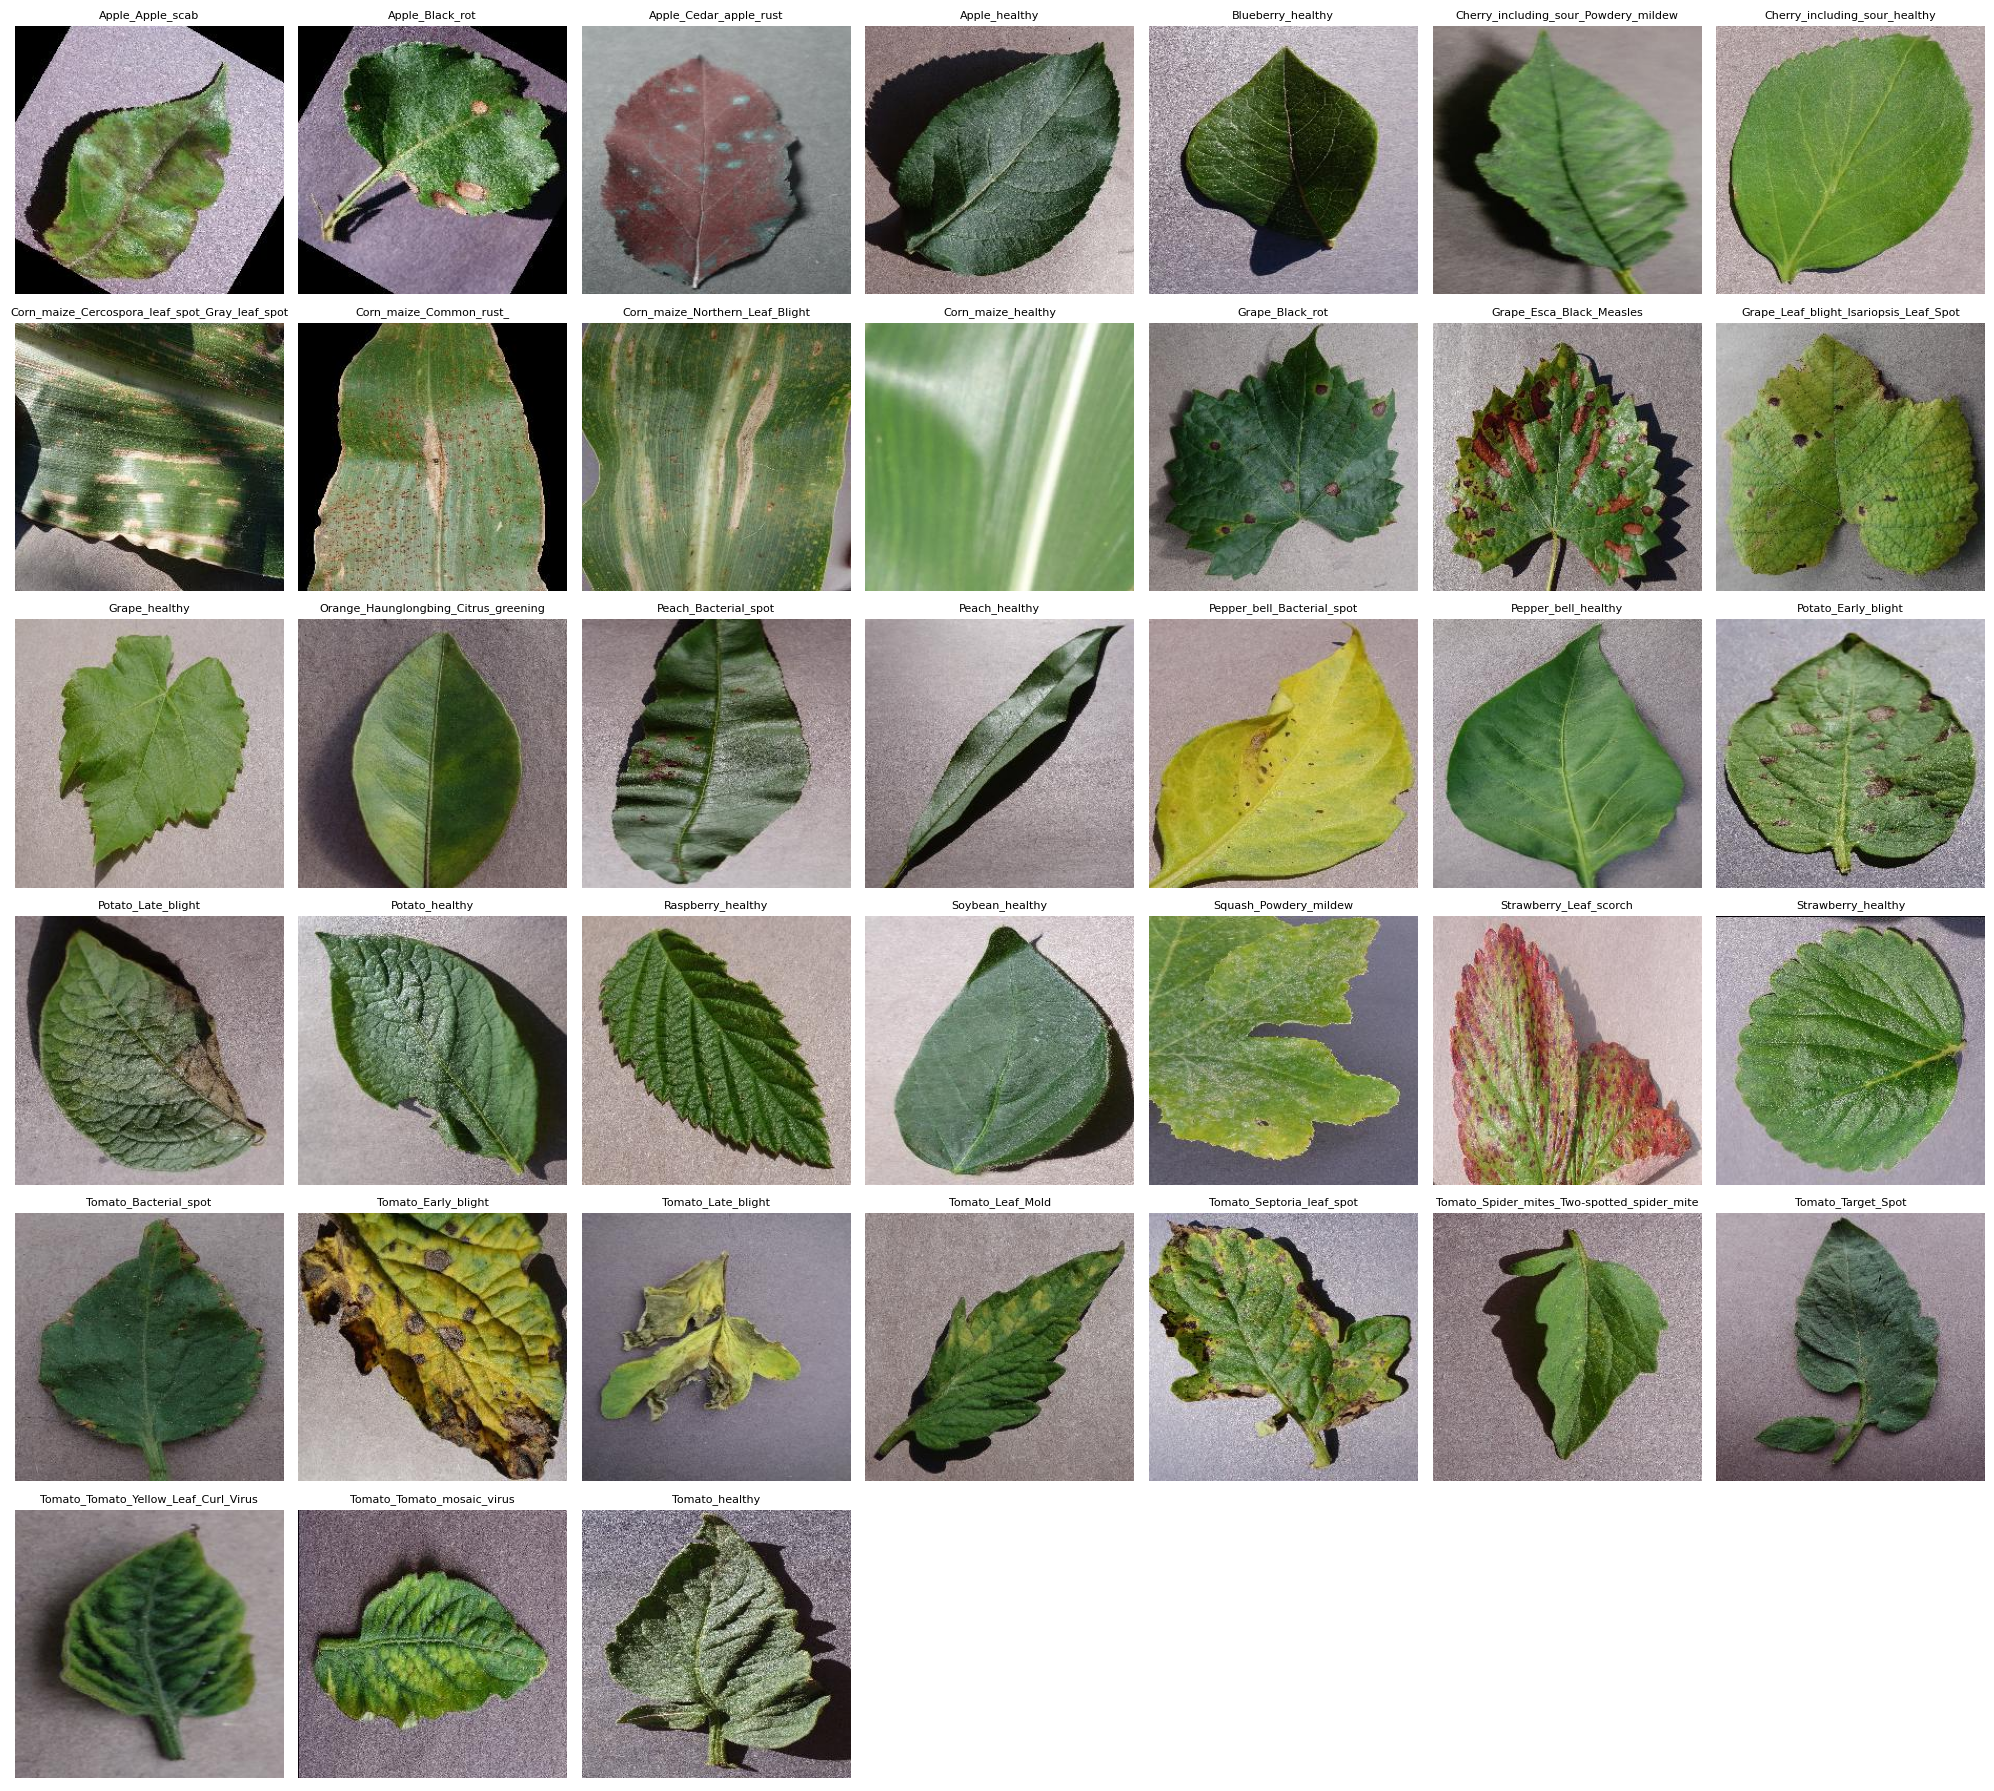

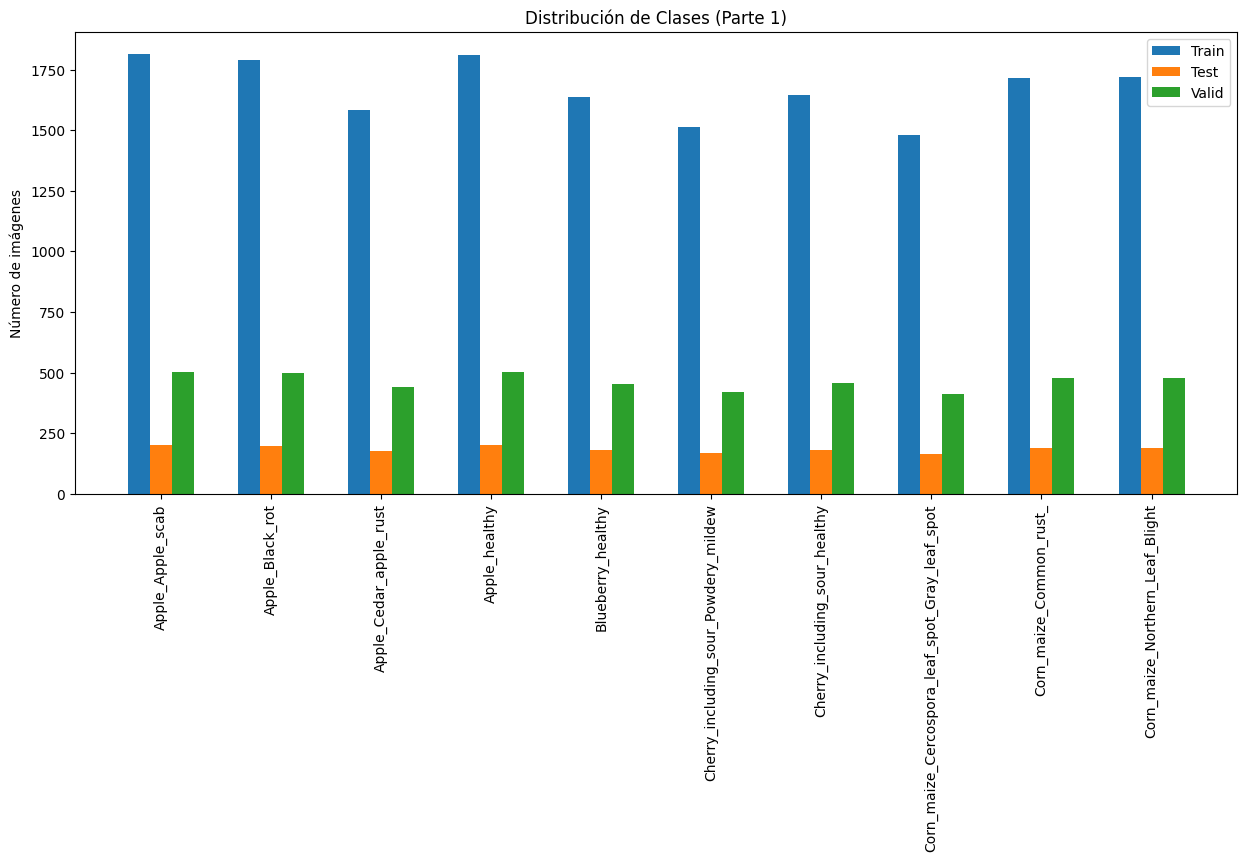

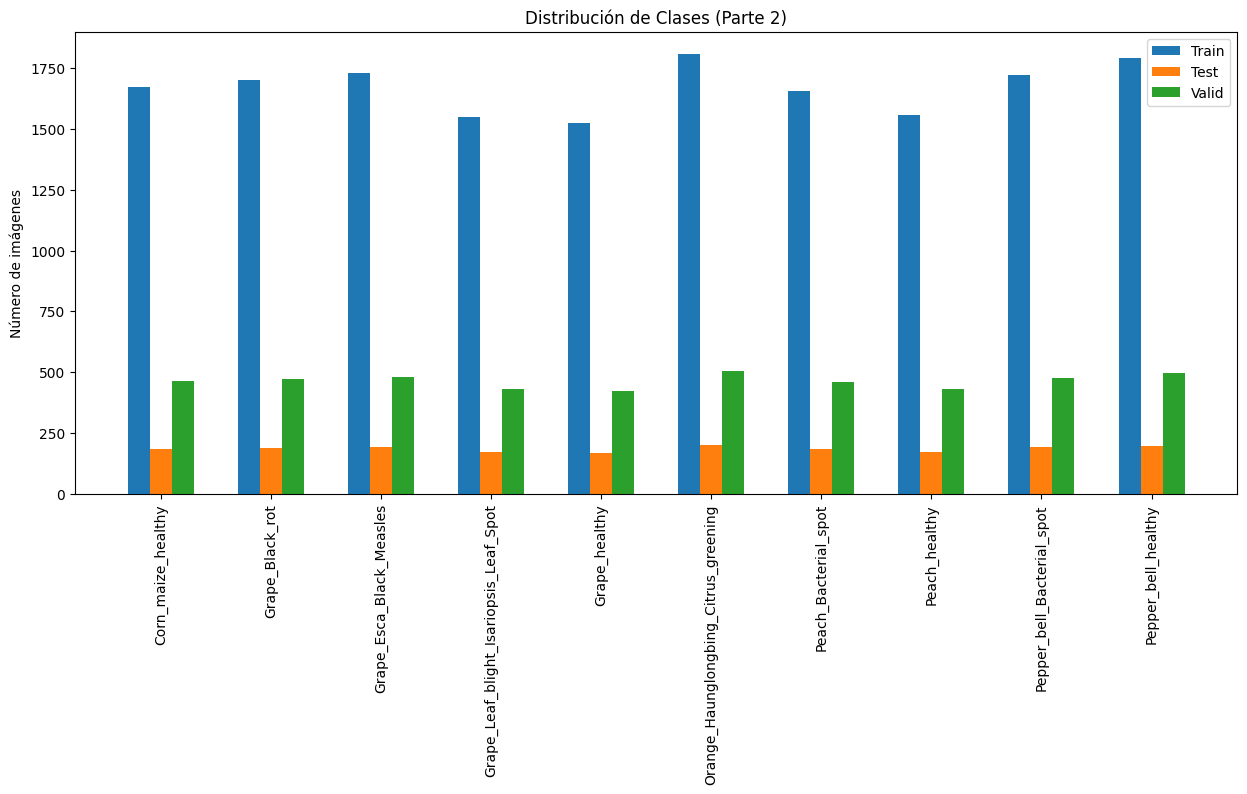

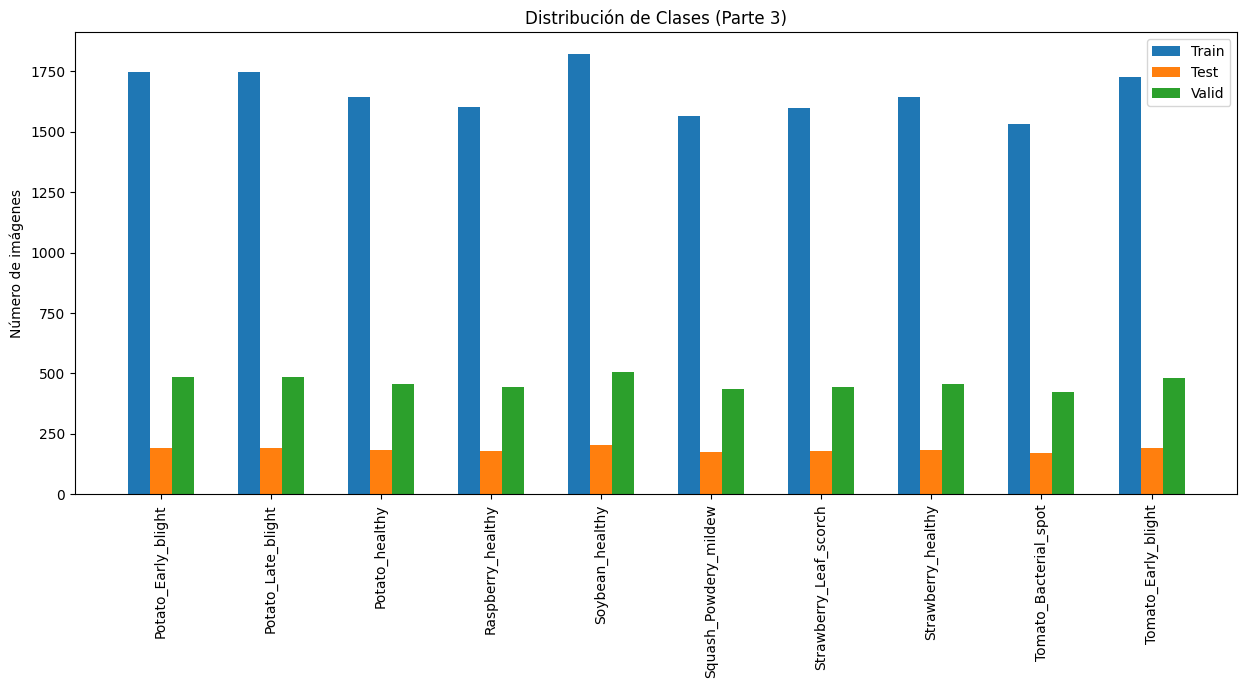

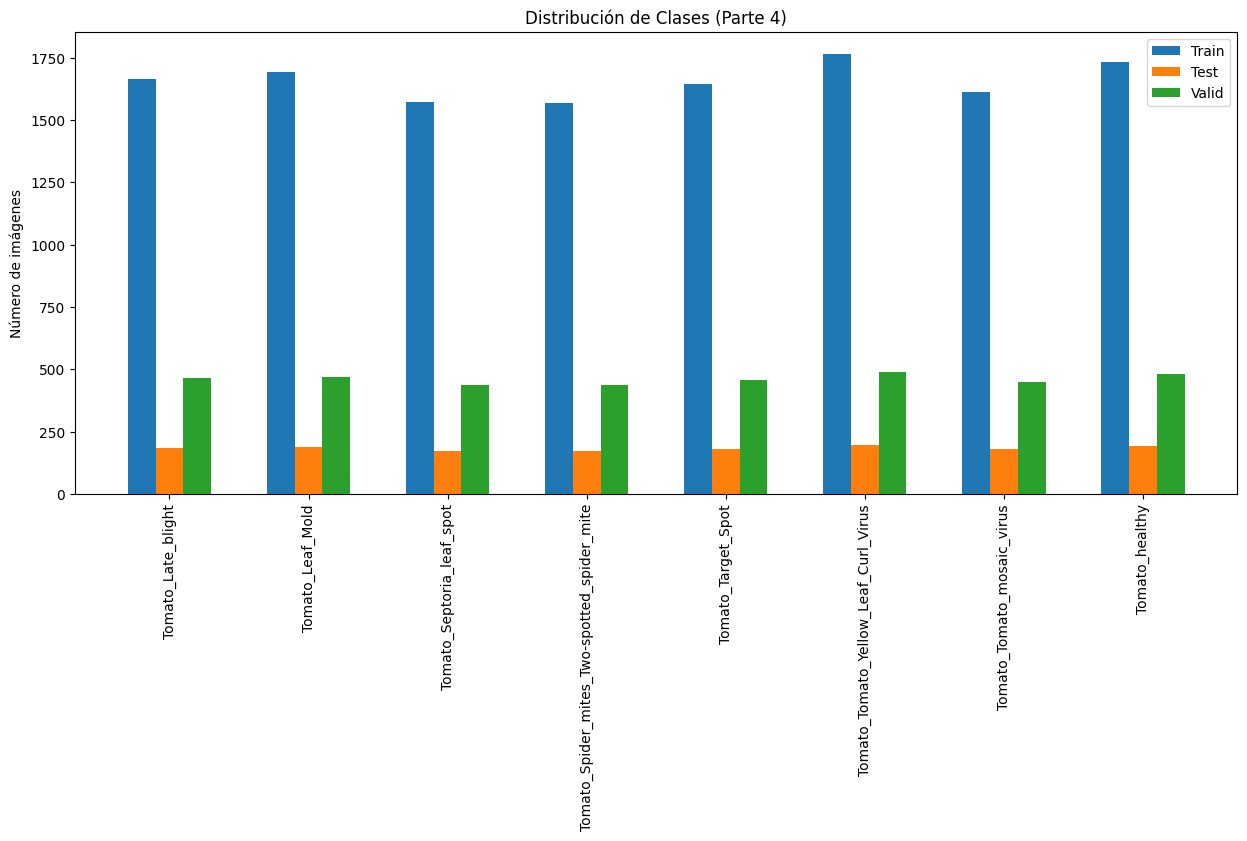

In [3]:
from src.utils.data_distribution import dataset_summary
dataset_summary("dataset")

Se puede observar que existe fotos de diferentes ángulos, iluminación y forma por lo que será necesario hacer un tratado de esa data. Además, se puede ver que la data está muy bien balanceada para las diferentes clases.

In [1]:
from src.utils.plantcv_filtering import PlantCVFilter

filtering = PlantCVFilter(debug=False)
filtered_results = filtering.filter_and_normalize_dataset("dataset", output_path="dataset_filtered")

print(f"Imágenes removidas por ser borrosas:", filtered_results)


Filtrando y normalizando train...


Procesando train: 100%|██████████| 63282/63282 [07:58<00:00, 132.22it/s]


Filtrado de train completado.
Filtrando y normalizando test...


Procesando test: 100%|██████████| 7013/7013 [01:51<00:00, 62.64it/s]


Filtrado de test completado.
Filtrando y normalizando valid...


Procesando valid: 100%|██████████| 17572/17572 [04:32<00:00, 64.54it/s]

Filtrado de valid completado.
Filtrado y normalización completados.
Imágenes removidas por ser borrosas: 2224


In [2]:
from src.utils.data_distribution import dataset_summary
dataset_summary("dataset_filtered")

NotADirectoryError: [WinError 267] The directory name is invalid: 'dataset_filtered\\train\\train_apple_apple_scab_1.JPG'

Se puede apreciar que la data aun sigue balanceada.

In [1]:
from src.utils.detect_multiple_leaves import analyze_dataset

dataset_stats = analyze_dataset("./dataset_filtered/", debug=True)
print(dataset_stats)

Procesando imágenes: 100%|██████████| 85643/85643 [06:37<00:00, 215.38it/s]


Copied to deprecated: c:\Users\roddy\Desktop\Diagnostico-de-enfermedades-en-hojas-de-tomate-mediante-PlantCV\dataset_deprecated\train\Apple_Apple_scab\train_apple_apple_scab_1366.JPG
Copied to deprecated: c:\Users\roddy\Desktop\Diagnostico-de-enfermedades-en-hojas-de-tomate-mediante-PlantCV\dataset_deprecated\train\Apple_Apple_scab\train_apple_apple_scab_1367.JPG
Copied to deprecated: c:\Users\roddy\Desktop\Diagnostico-de-enfermedades-en-hojas-de-tomate-mediante-PlantCV\dataset_deprecated\train\Apple_Apple_scab\train_apple_apple_scab_1368.JPG
Copied to deprecated: c:\Users\roddy\Desktop\Diagnostico-de-enfermedades-en-hojas-de-tomate-mediante-PlantCV\dataset_deprecated\train\Apple_Apple_scab\train_apple_apple_scab_1380.JPG
Copied to deprecated: c:\Users\roddy\Desktop\Diagnostico-de-enfermedades-en-hojas-de-tomate-mediante-PlantCV\dataset_deprecated\train\Apple_Apple_scab\train_apple_apple_scab_1585.JPG
Copied to deprecated: c:\Users\roddy\Desktop\Diagnostico-de-enfermedades-en-hojas-de-

In [1]:
from src.utils.detect_multiple_leaves import detect_multiple_leaves

num_leaves = detect_multiple_leaves("./dataset_filtered/train/Apple_Apple_scab/train_apple_apple_scab_1090.JPG", debug=False)
print(f"Numero de hojas detectadas: {num_leaves}")


Numero de hojas detectadas: (1, './dataset_filtered/train/Apple_Apple_scab/train_apple_apple_scab_1090.JPG')


In [2]:
from src.utils.image_processing_utils import blur_background, correct_lighting

# Aplicar desenfoque al fondo
blurred_img_path = blur_background("./dataset_filtered/train/Apple_Apple_scab/train_apple_apple_scab_2.JPG", debug=True)

# Segmentar y guardar en dataset_processed
#segmented_path = segment_leaf("./dataset_filtered/train/Apple_Apple_scab/train_apple_apple_scab_2.JPG", debug=True)

# Corregir iluminación y guardar en dataset_processed
#corrected_path = correct_lighting("./dataset_filtered/train/Apple_Apple_scab/train_apple_apple_scab_2.JPG", debug=True)



Blurred background image saved at: ./dataset_processed_filtered/train/Apple_Apple_scab/train_apple_apple_scab_2.JPG


## Modelos de clasificacion multiclases

In [ ]:
!nvidia-smi

In [3]:
#pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121 --timeout 1000 --retries 10
import torch

if torch.cuda.is_available():
    device_count = torch.cuda.device_count()
    print(f"{device_count} GPU(s) available:")
    for i in range(device_count):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(torch.backends.cudnn.version())  # Versión de cuDNN
        print(torch.cuda.get_device_name(0))  # Debe mostrar RTX 4060
else:
    print("No CUDA compatible GPU detected.")


1 GPU(s) available:
GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU
90100
NVIDIA GeForce RTX 4060 Laptop GPU


In [ ]:
# Se crean los modelos y se los entrenan
from src.models.model import baseLineModel

# Número de clases detectadas en el dataset
num_classes = len(class_names)

# Inicializar el modelo
model = baseLineModel(num_classes)
print(model)


In [ ]:
def reset_weights(m):
    if hasattr(m, "reset_parameters"):
        m.reset_parameters()

In [ ]:
from src.models.train import train_model

model.apply(reset_weights)

# Definir hiperparámetros
num_epochs = 10
learning_rate = 0.001

# Entrenar el modelo
trained_model, history1 = train_model(model, train_loader, valid_loader, num_epochs, learning_rate)

Se guardan los pesos de este modelo para usarlo en las proximas predicciones

In [ ]:
torch.save(trained_model.state_dict(), "base_line.pth")

## Comparacion de los mejores modelos obtenidos

In [ ]:
# Se compara los modelos obtenidos y se decide por el mejor
from src.models.evaluate import evaluate_model
test_loss, test_acc = evaluate_model(trained_model, test_loader)


## Predicciones con el mejor modelo para este caso

En caso que se quiera usar un modelo ya entrenado previamente

In [ ]:
import torch
from src.models.model import baseLineModel  # Importa la arquitectura de tu modelo

num_classes = len(class_names)

# Inicializar el modelo
trained_model = baseLineModel(num_classes)

# Cargar los pesos entrenados
trained_model.load_state_dict(torch.load("base_line.pth"))

# Poner el modelo en modo evaluación
trained_model.eval()

print("Modelo cargado exitosamente.")

In [ ]:
#Se crea una clase para hacer la prediccion en base a una imagen nueva
from src.models.predict import predict_image
#predicted_class, confidence = predict_image(image_path="./data/test/Late_blight/test_late_blight_1.JPG",model=trained_model,
#                                            class_names=class_names
#)
predicted_class, confidence = predict_image(image_path="./data/test/Late_blight/test_late_blight_1.JPG",weights_path="base_line.pth",
    class_names=class_names
)

print(f"La enfermedad detectada es: {predicted_class} con una probabilidad de {confidence:.2%}")